In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

Reading in data from survey responses as csv

In [2]:
df = pd.read_csv('form_responses.csv')
df.head()

,Timestamp,Gender,Age,Common eating & sleeping patterns?,Dinner time,Bed time,wakefulness,happiness,energized-drained,active-inactive,attentive,Difference between eat time and sleep time
0,12/17/2023 13:05:22,Female,12,Yes,7:00 PM,8:00 PM,4,3,2,2,3,1.0
1,1/1/2024 13:13:35,Female,12,Yes,7:00 PM,9:00 PM,2,3,1,2,1,2.0
2,1/2/2024 16:20:42,Male,12,Yes,8:00 PM,9:00 PM,4,3,3,3,3,1.0
3,1/4/2024 15:05:13,Female,20,No,6:00 PM,12:00 AM,4,2,2,2,4,6.0
4,1/4/2024 15:35:56,Male,20,No,8:00 PM,12:00 AM,1,3,5,3,4,4.0


Data Preprocessing

In [3]:
# converting gender to numeric
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1}) 

# converting time to minutes past midnight
def convert_time(time_str):
    t = pd.to_datetime(time_str)
    return t.hour * 60 + t.minute

df['Dinner time'] = df['Dinner time'].apply(convert_time)
df['Bed time'] = df['Bed time'].apply(convert_time)

df.head()

,Timestamp,Gender,Age,Common eating & sleeping patterns?,Dinner time,Bed time,wakefulness,happiness,energized-drained,active-inactive,attentive,Difference between eat time and sleep time
0,12/17/2023 13:05:22,0,12,Yes,1140,1200,4,3,2,2,3,1.0
1,1/1/2024 13:13:35,0,12,Yes,1140,1260,2,3,1,2,1,2.0
2,1/2/2024 16:20:42,1,12,Yes,1200,1260,4,3,3,3,3,1.0
3,1/4/2024 15:05:13,0,20,No,1080,0,4,2,2,2,4,6.0
4,1/4/2024 15:35:56,1,20,No,1200,0,1,3,5,3,4,4.0


In [4]:
features = df[['Gender', 'Age', 'Difference between eat time and sleep time', 'Dinner time', 'Bed time']]
labels = df[['wakefulness', 'happiness', 'energized-drained', 'active-inactive', 'attentive']]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.05, random_state=42)

In [5]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(mse)

0.6269217574121313


/Users/rahilshaik/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


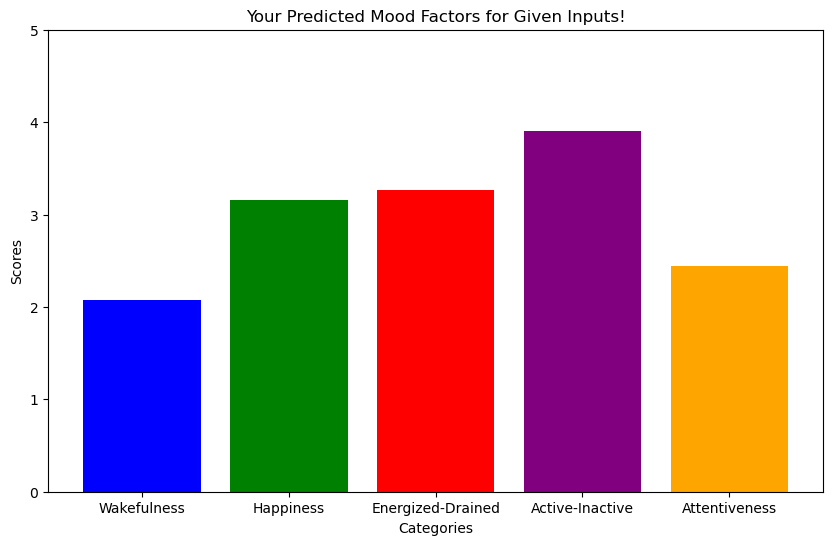

In [6]:

def predict_and_display(gender, age, eat_sleep_diff, dinner_time, bed_time):
    gender_numeric = 0 if gender.lower() == 'female' else 1
    new_dinner_time = convert_time(dinner_time)
    new_bed_time = convert_time(bed_time)
    prediction = model.predict([[gender_numeric, age, eat_sleep_diff, new_dinner_time, new_bed_time]])
    wakefulness, happiness, energized_drained, active_inactive, attentiveness = prediction[0]

   
    categories = ['Wakefulness', 'Happiness', 'Energized-Drained', 'Active-Inactive', 'Attentiveness']
    values = [wakefulness, happiness, energized_drained, active_inactive, attentiveness]

    plt.figure(figsize=(10, 6))
    plt.bar(categories, values, color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.xlabel('Categories')
    plt.ylabel('Scores')
    plt.title('Your Predicted Mood Factors for Given Inputs!')
    plt.ylim(0, 5)  
    plt.show()

mse_percent =  np.round((mse)*100)
mse_percent_string = str(mse_percent) + "%"

predict_and_display('Female', 20, 4, '8:00 PM', '12:00 AM') # input gender, age, timeframe, dinner time, bed time in that order

